In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv(r'C:\ProjectWork\SMBA Project\data_common.csv')
df_1=df.drop(['Political_Regime','Country','Code','Region','InvestmentEnvironment', 'EnterpriseConditions',
       'MarketAccessInfrastructure', 'EconomicQuality', 'LivingConditions',
       'Health', 'Education','Global_Rank'],axis=1)
df_2=df.drop(['Political_Regime','Country','Code','Region'],axis=1)

In [88]:
df.columns

Index(['Country', 'Code', 'Region', 'Political_Regime', 'SafetySecurity',
       'PersonelFreedom', 'Governance', 'SocialCapital',
       'InvestmentEnvironment', 'EnterpriseConditions',
       'MarketAccessInfrastructure', 'EconomicQuality', 'LivingConditions',
       'Health', 'Education', 'NaturalEnvironment', 'Global_Rank'],
      dtype='object')

Text(0.5, 1.0, 'Political_Regime')

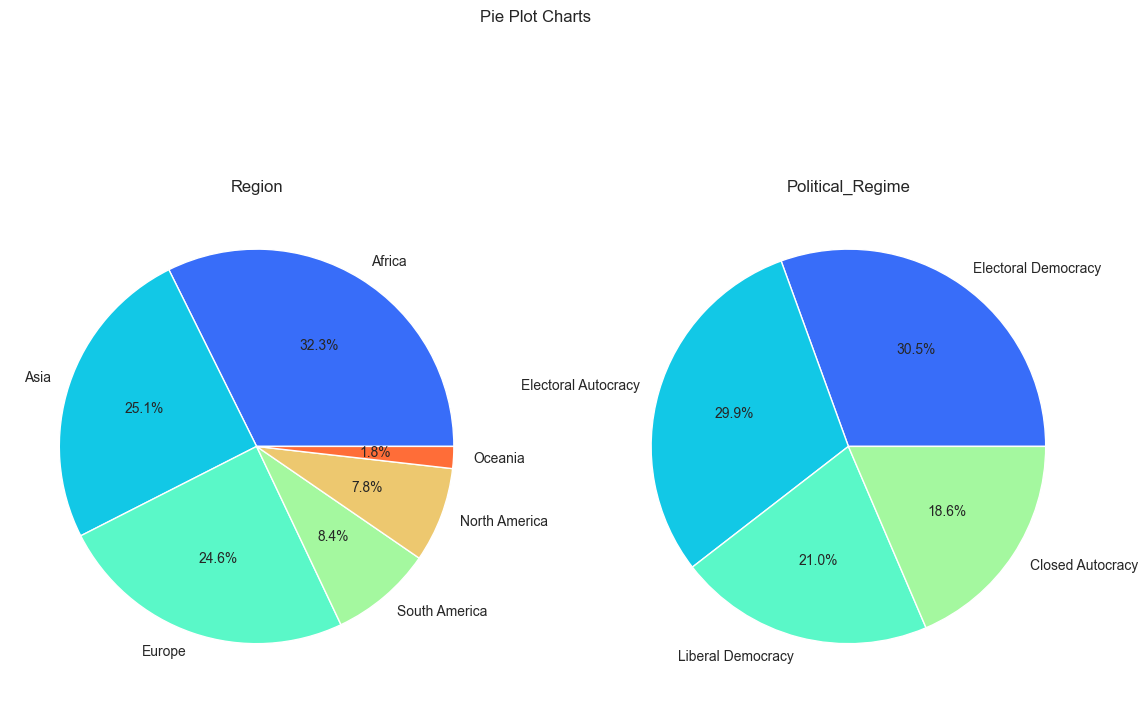

In [89]:
fig, axs = plt.subplots(1,2, figsize=(14,9))
fig.suptitle('Pie Plot Charts')

region = df['Region'].value_counts()
axs[0].pie(region, labels=region.index, autopct='%1.1f%%', colors=sns.color_palette('rainbow'))
axs[0].set_title('Region')

political = df['Political_Regime'].value_counts()
axs[1].pie(political, labels=political.index, autopct='%1.1f%%', colors=sns.color_palette('rainbow'),)
axs[1].set_title('Political_Regime')

<Axes: >

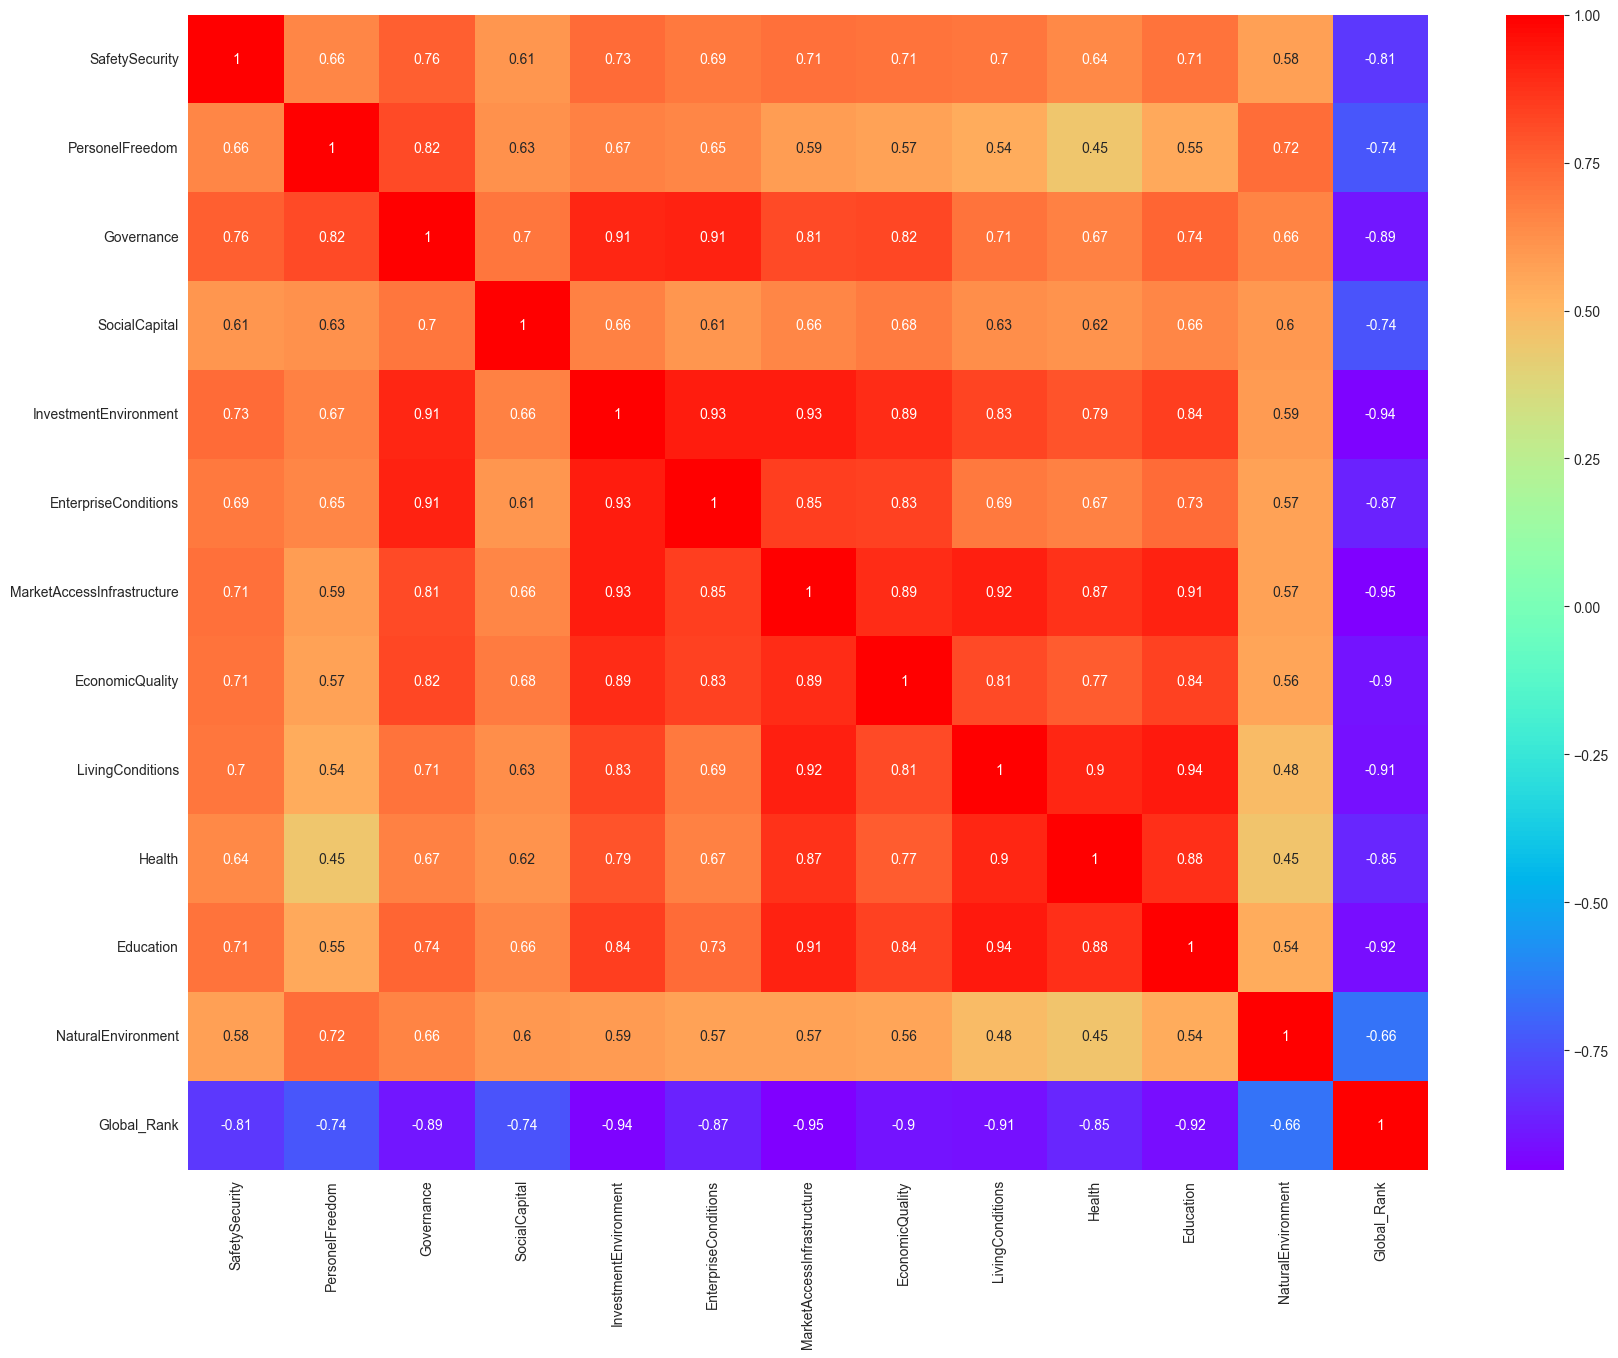

In [90]:
corr1 = df_2.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr1, annot=True, cmap='rainbow')

<Axes: >

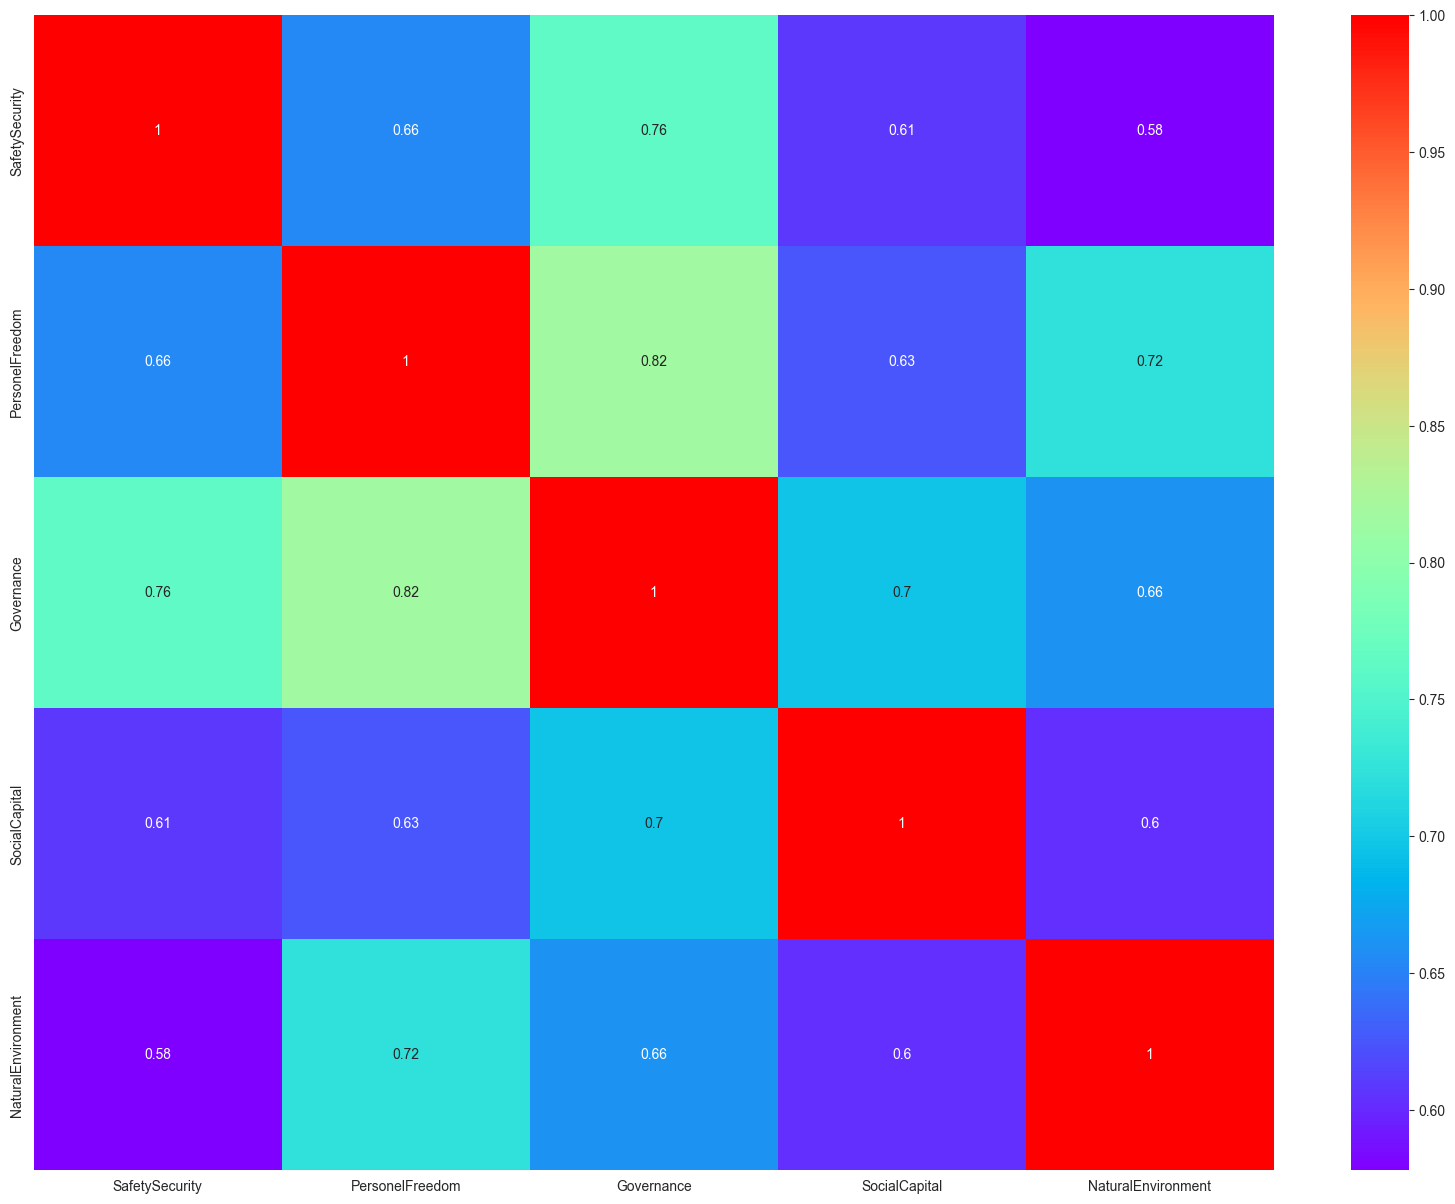

In [91]:
corr = df_1.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True,cmap='rainbow')

In [92]:
import plotly.express as px
map_fig = px.choropleth(df, locations='Code', color='Political_Regime')
#map_fig = px.scatter_geo(df_my, locations = 'code', hover_name='political_regime',color='political_regime')
map_fig.show()

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df[['SafetySecurity', 'PersonelFreedom', 'Governance', 'SocialCapital','NaturalEnvironment']]
y = df[['Global_Rank']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
n = X_test.shape[0]  # Number of observations
p = X_test.shape[1]  # Number of features
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
print(f'Adjusted R2 Score: {adjusted_r2}')

Mean Squared Error: 342.16448157895087
R^2 Score: 0.8323743849980815
Adjusted R2 Score: 0.8024412394620246


<Axes: xlabel='Political_Regime', ylabel='SafetySecurity'>

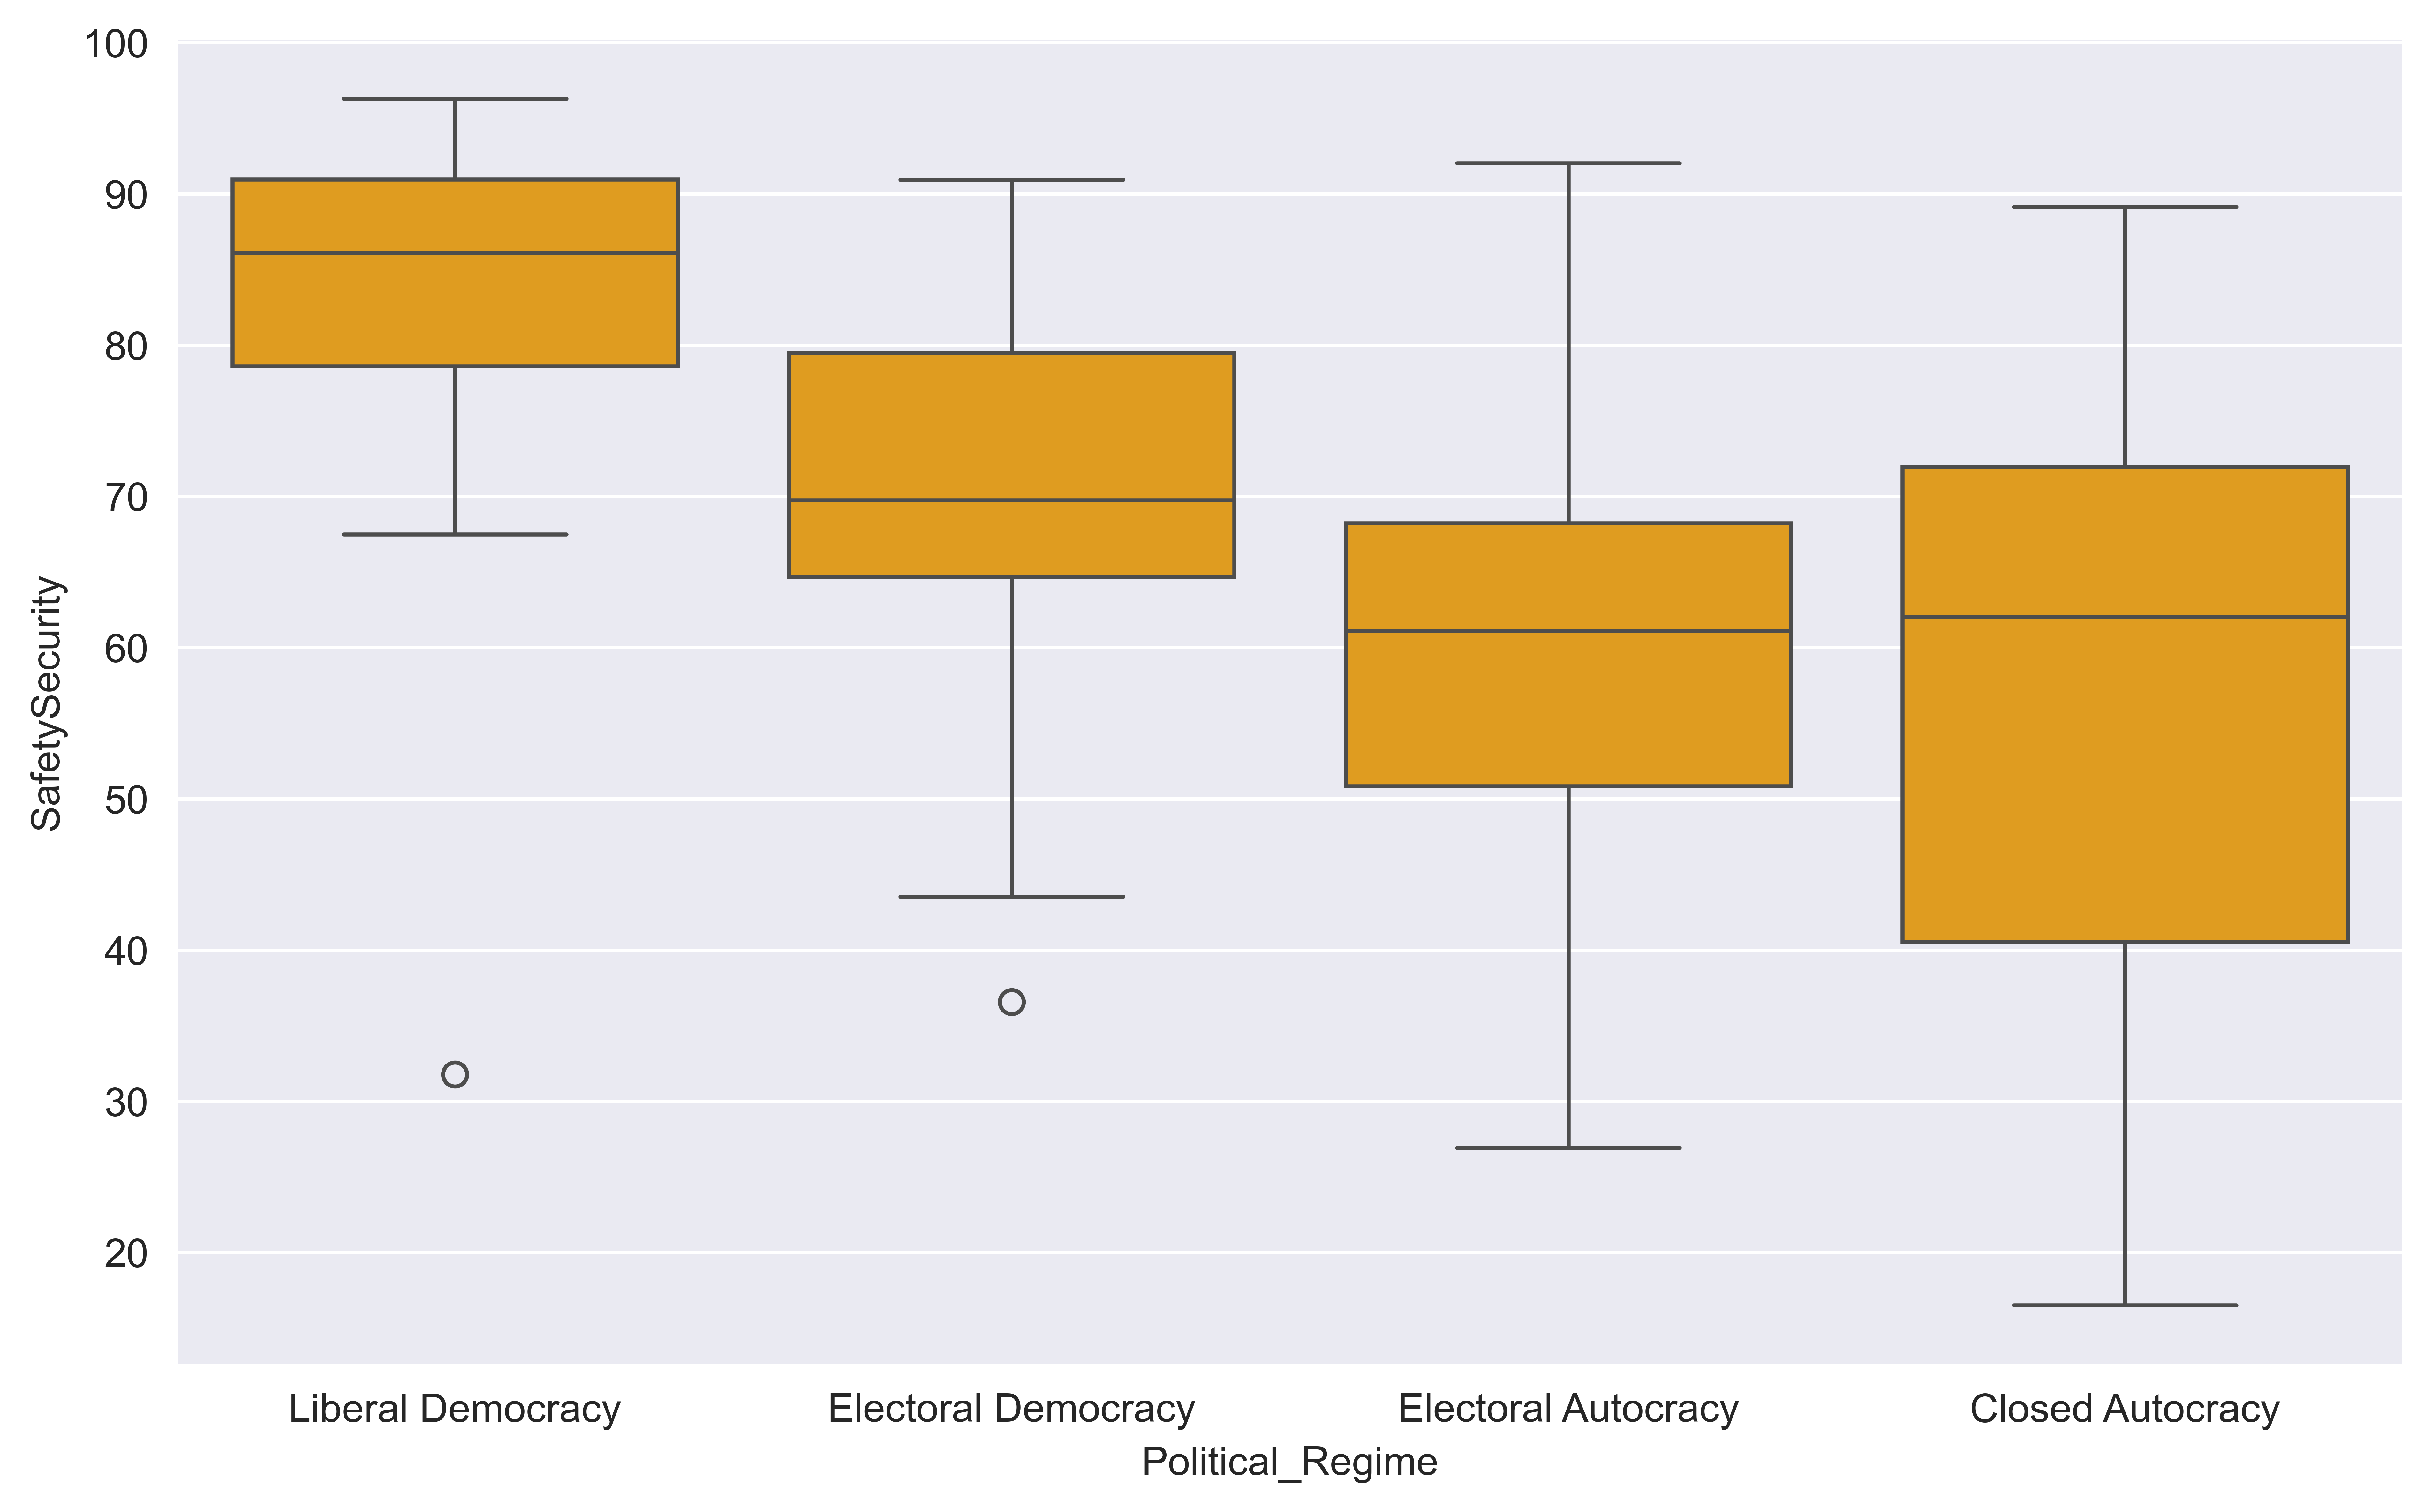

In [94]:
plt.figure(figsize=(10, 6), dpi=900)
sns.boxplot(x='Political_Regime', y='SafetySecurity', data=df,color='orange')

<Axes: xlabel='Political_Regime', ylabel='Governance'>

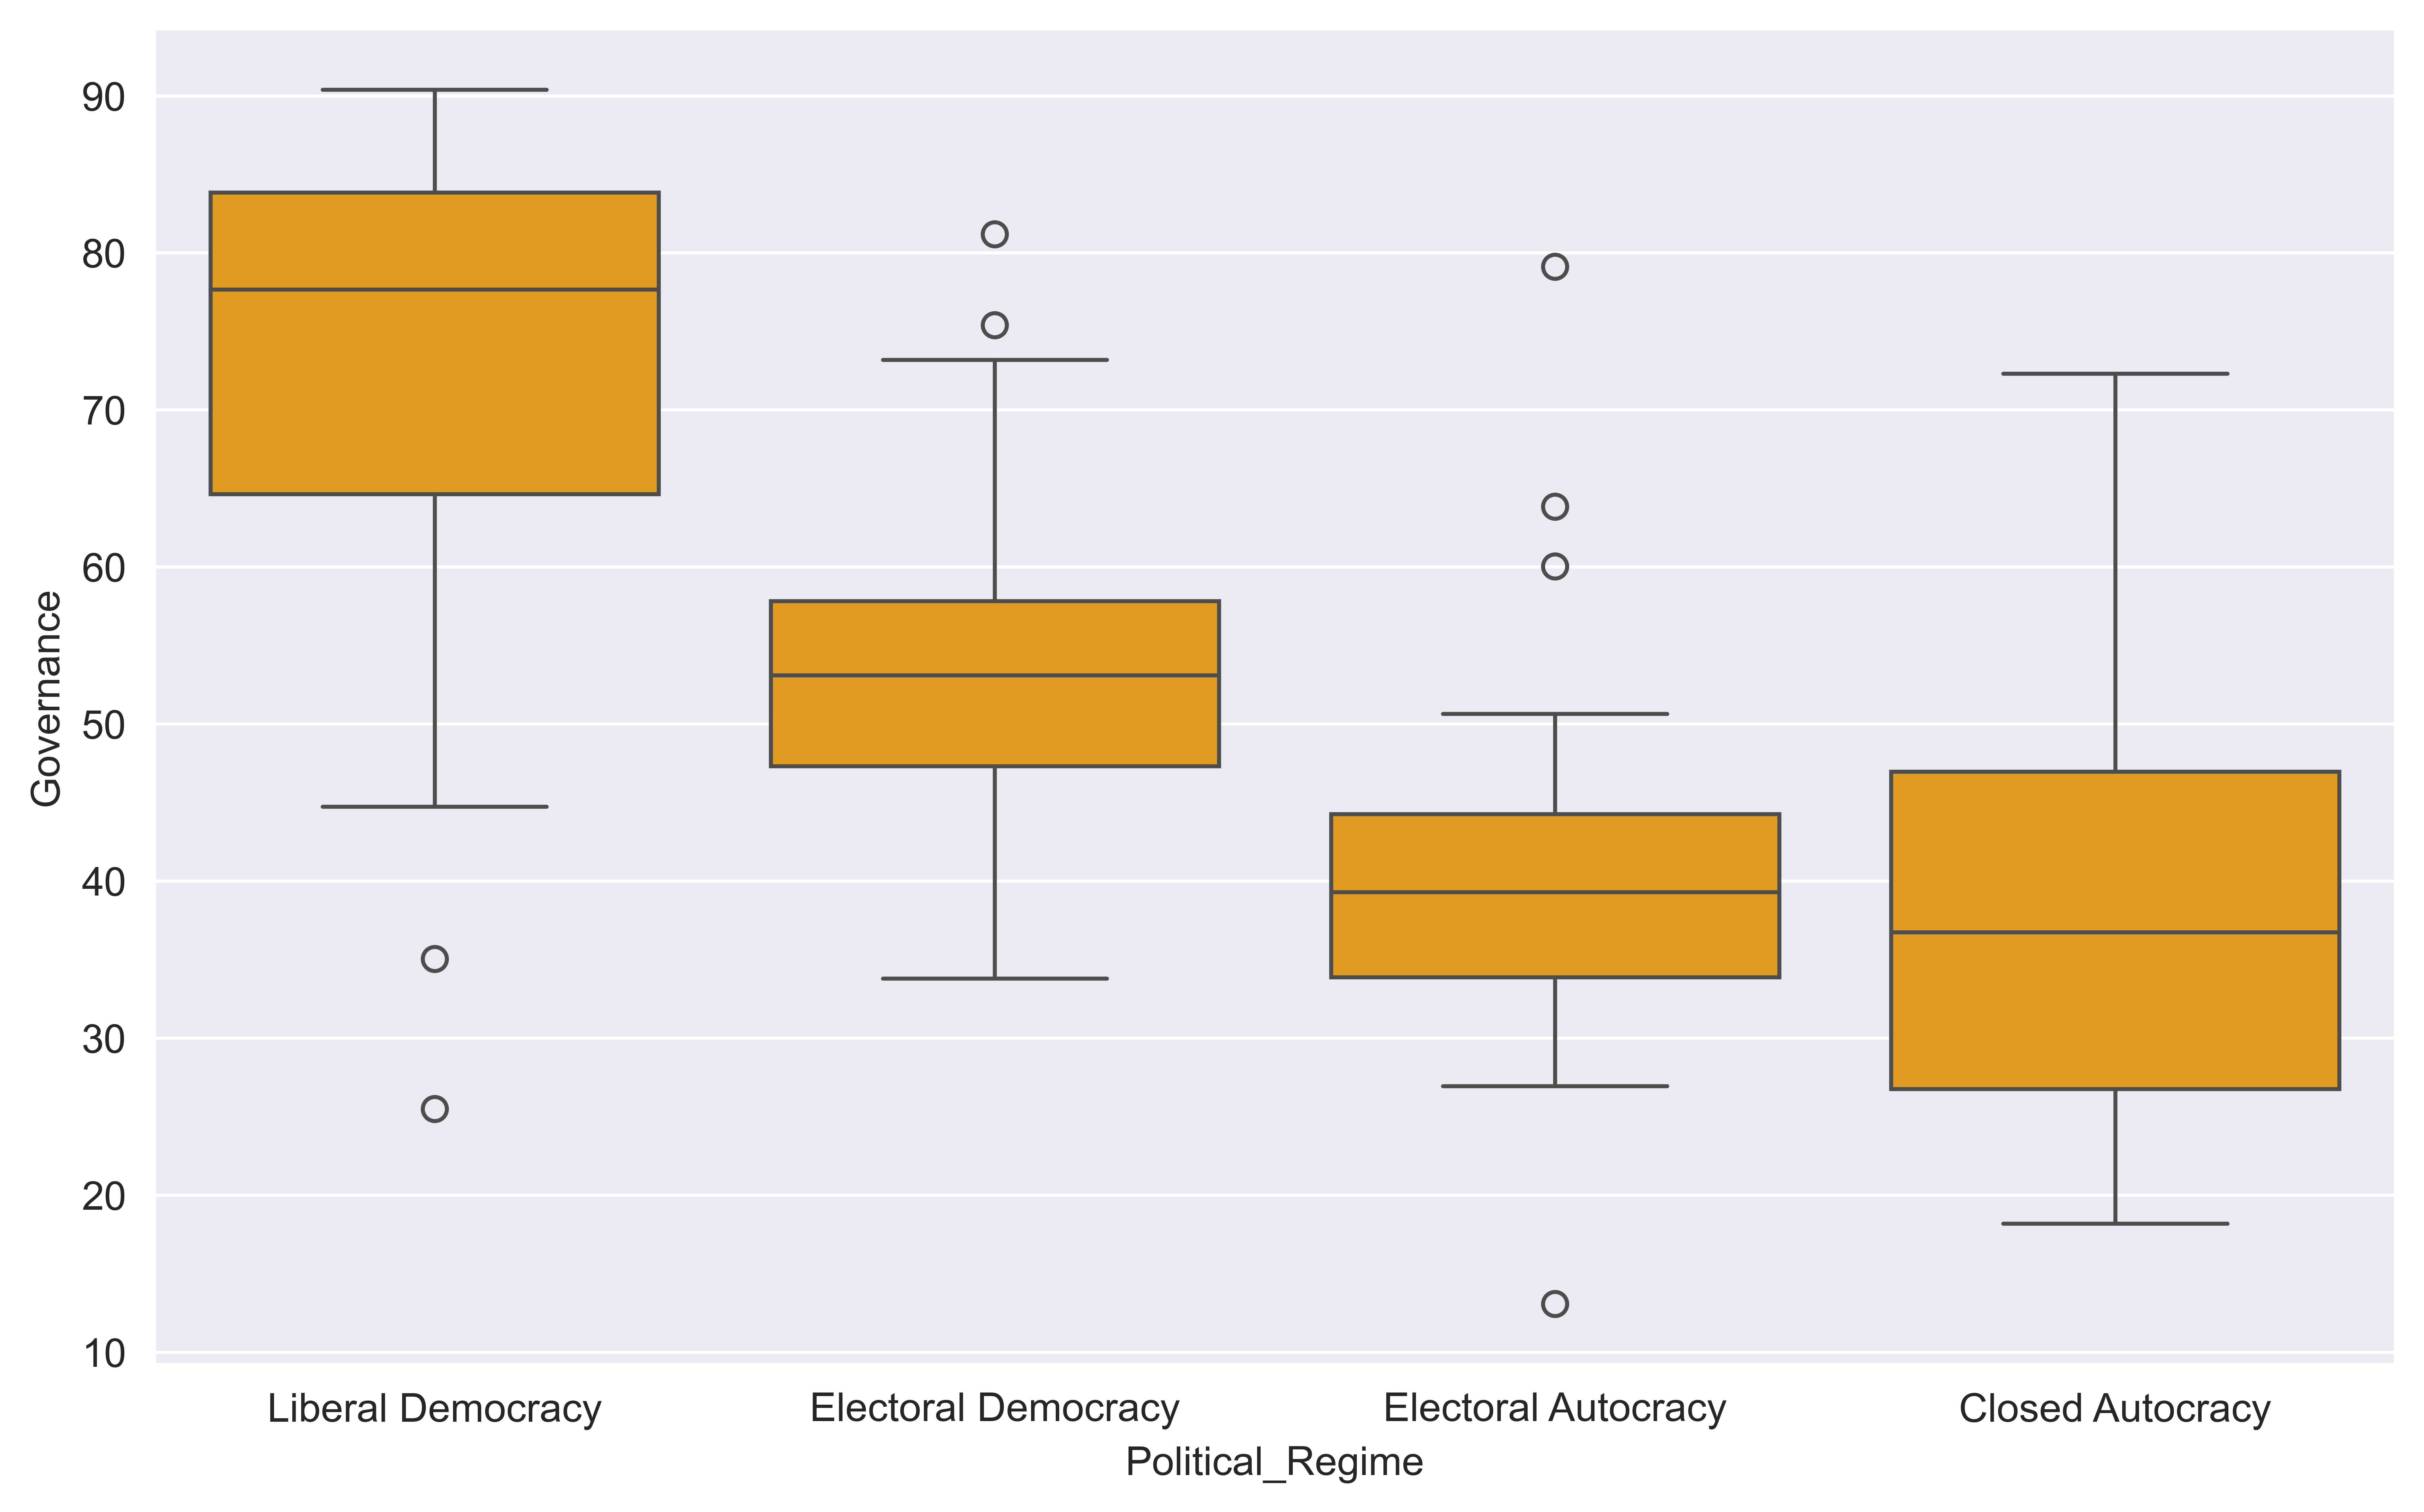

In [95]:
#fig, axes = plt.plot(figsize=(15, 4))
plt.figure(figsize=(10, 6), dpi=900)
sns.boxplot(x='Political_Regime', y='Governance', data=df,color='orange')


<Axes: xlabel='Political_Regime', ylabel='SocialCapital'>

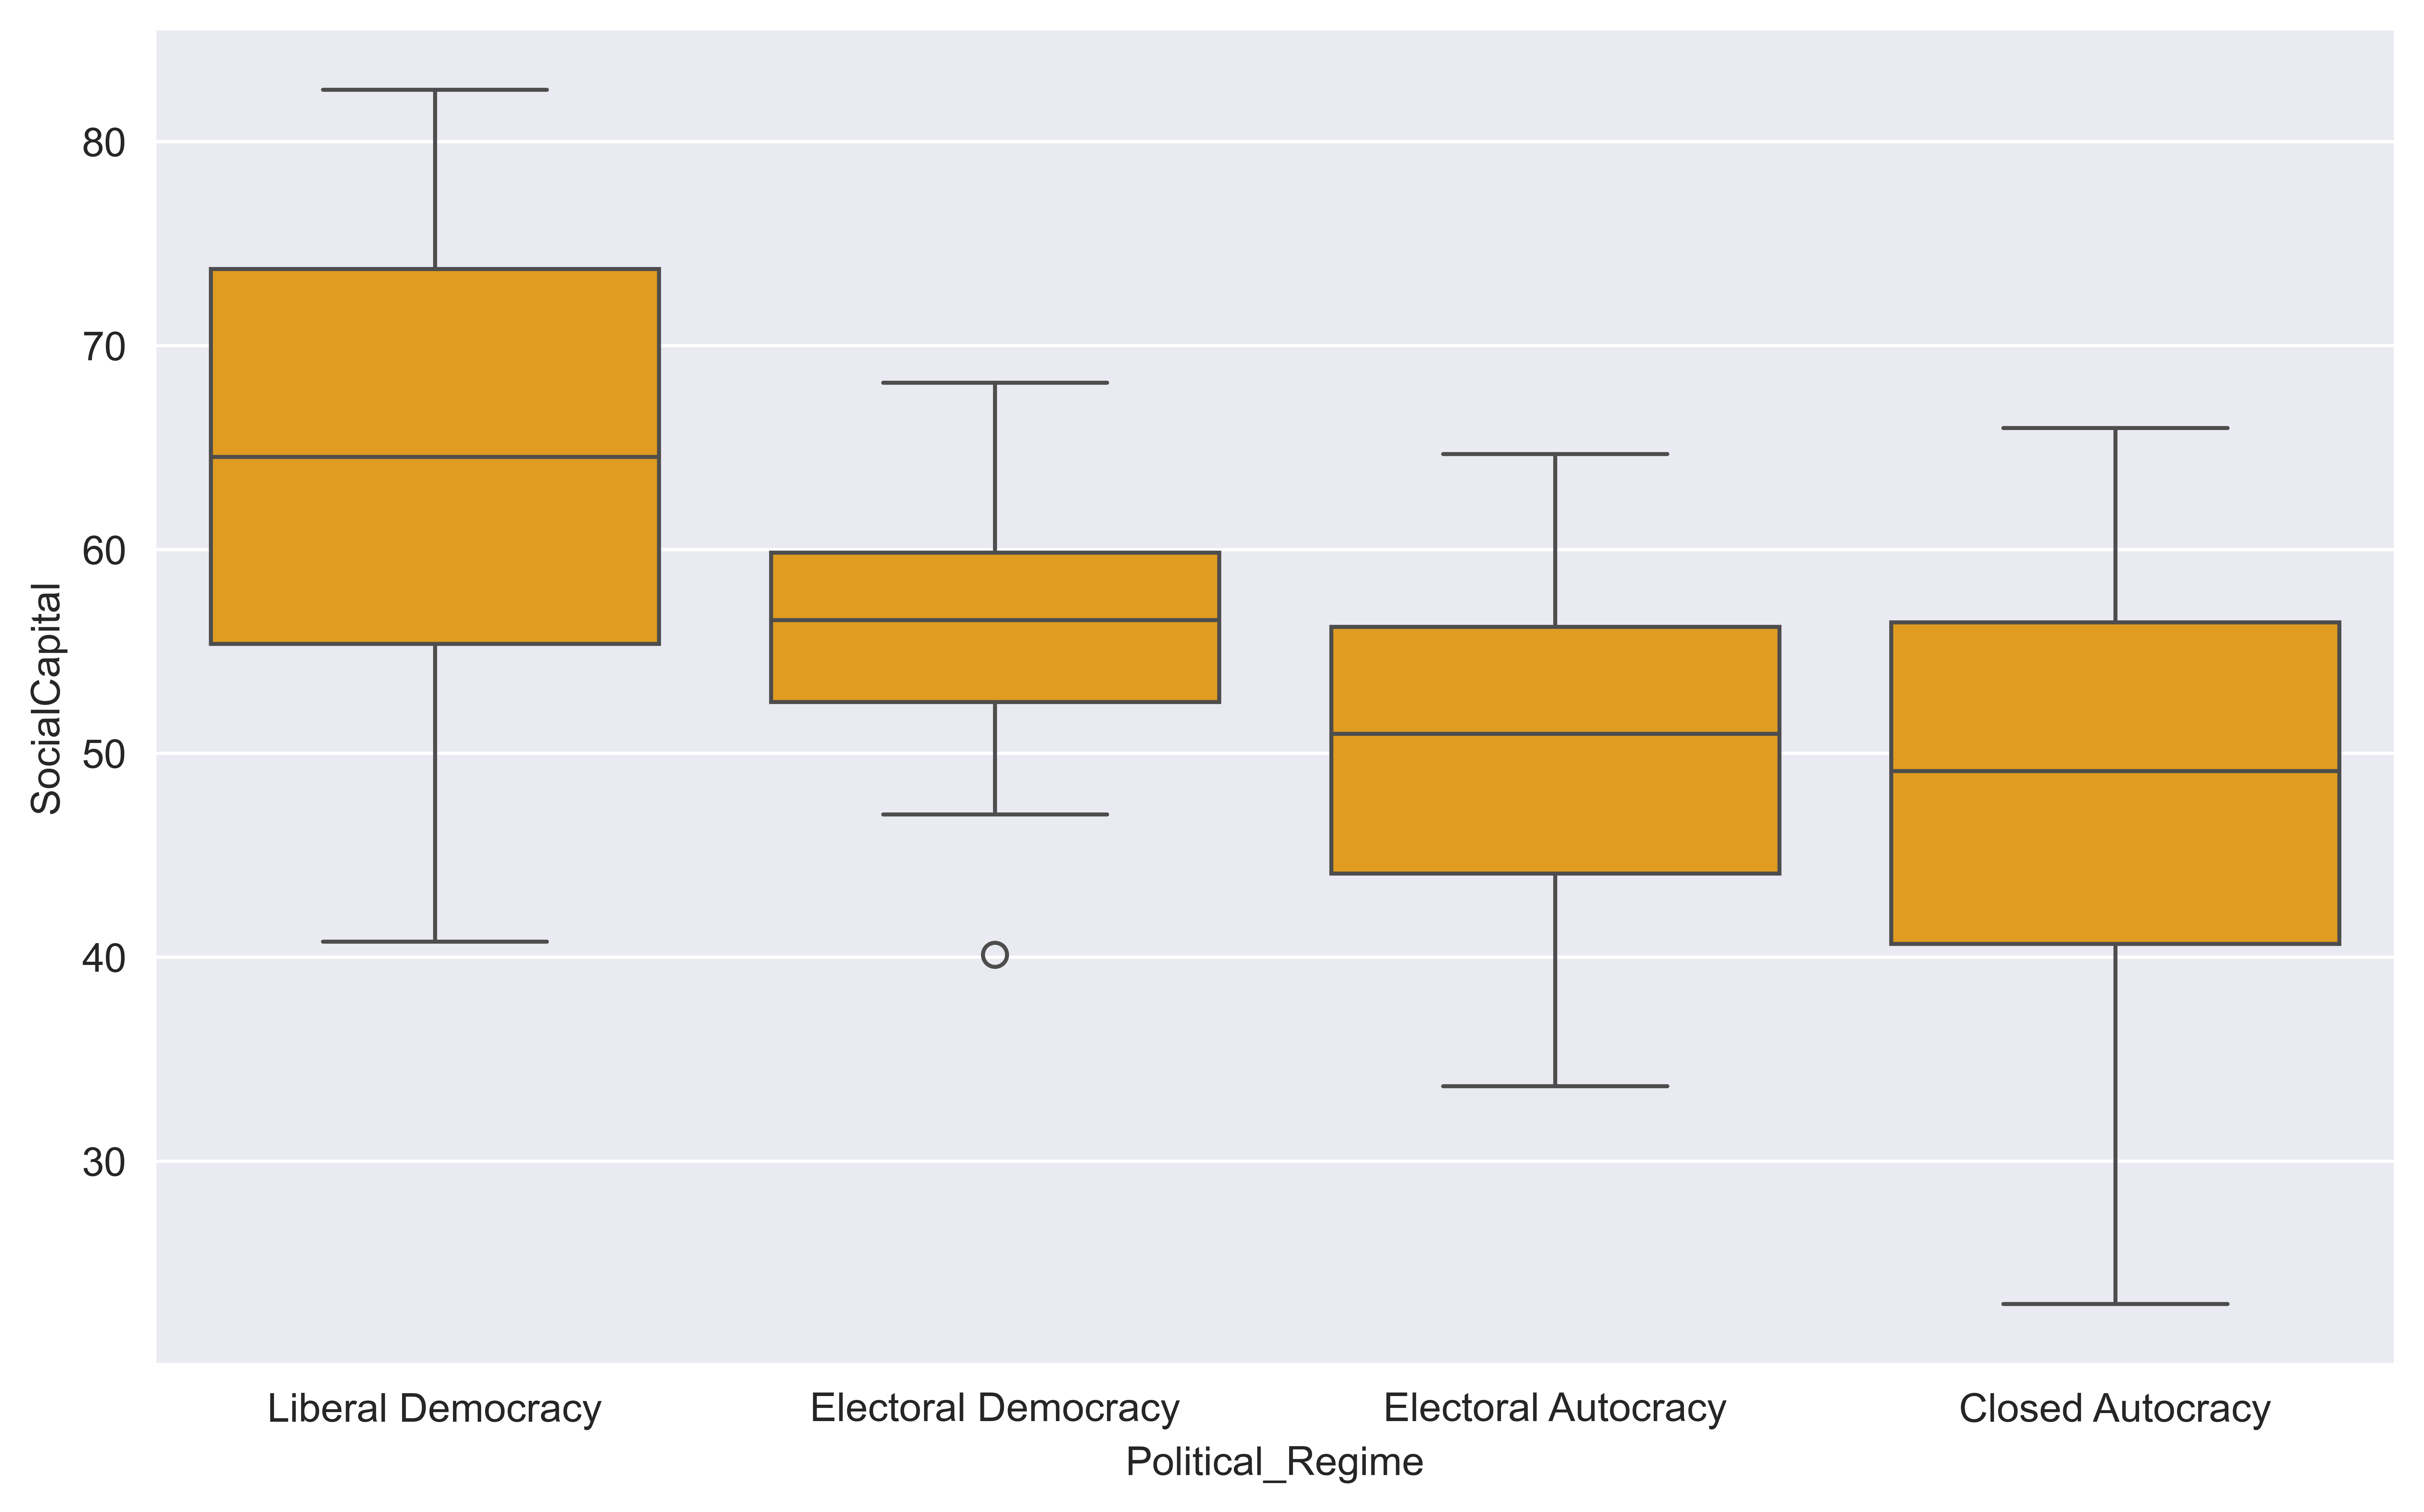

In [96]:
plt.figure(figsize=(10, 6), dpi=900)
sns.boxplot(x='Political_Regime', y='SocialCapital', data=df,color='orange')


<Axes: xlabel='Political_Regime', ylabel='NaturalEnvironment'>

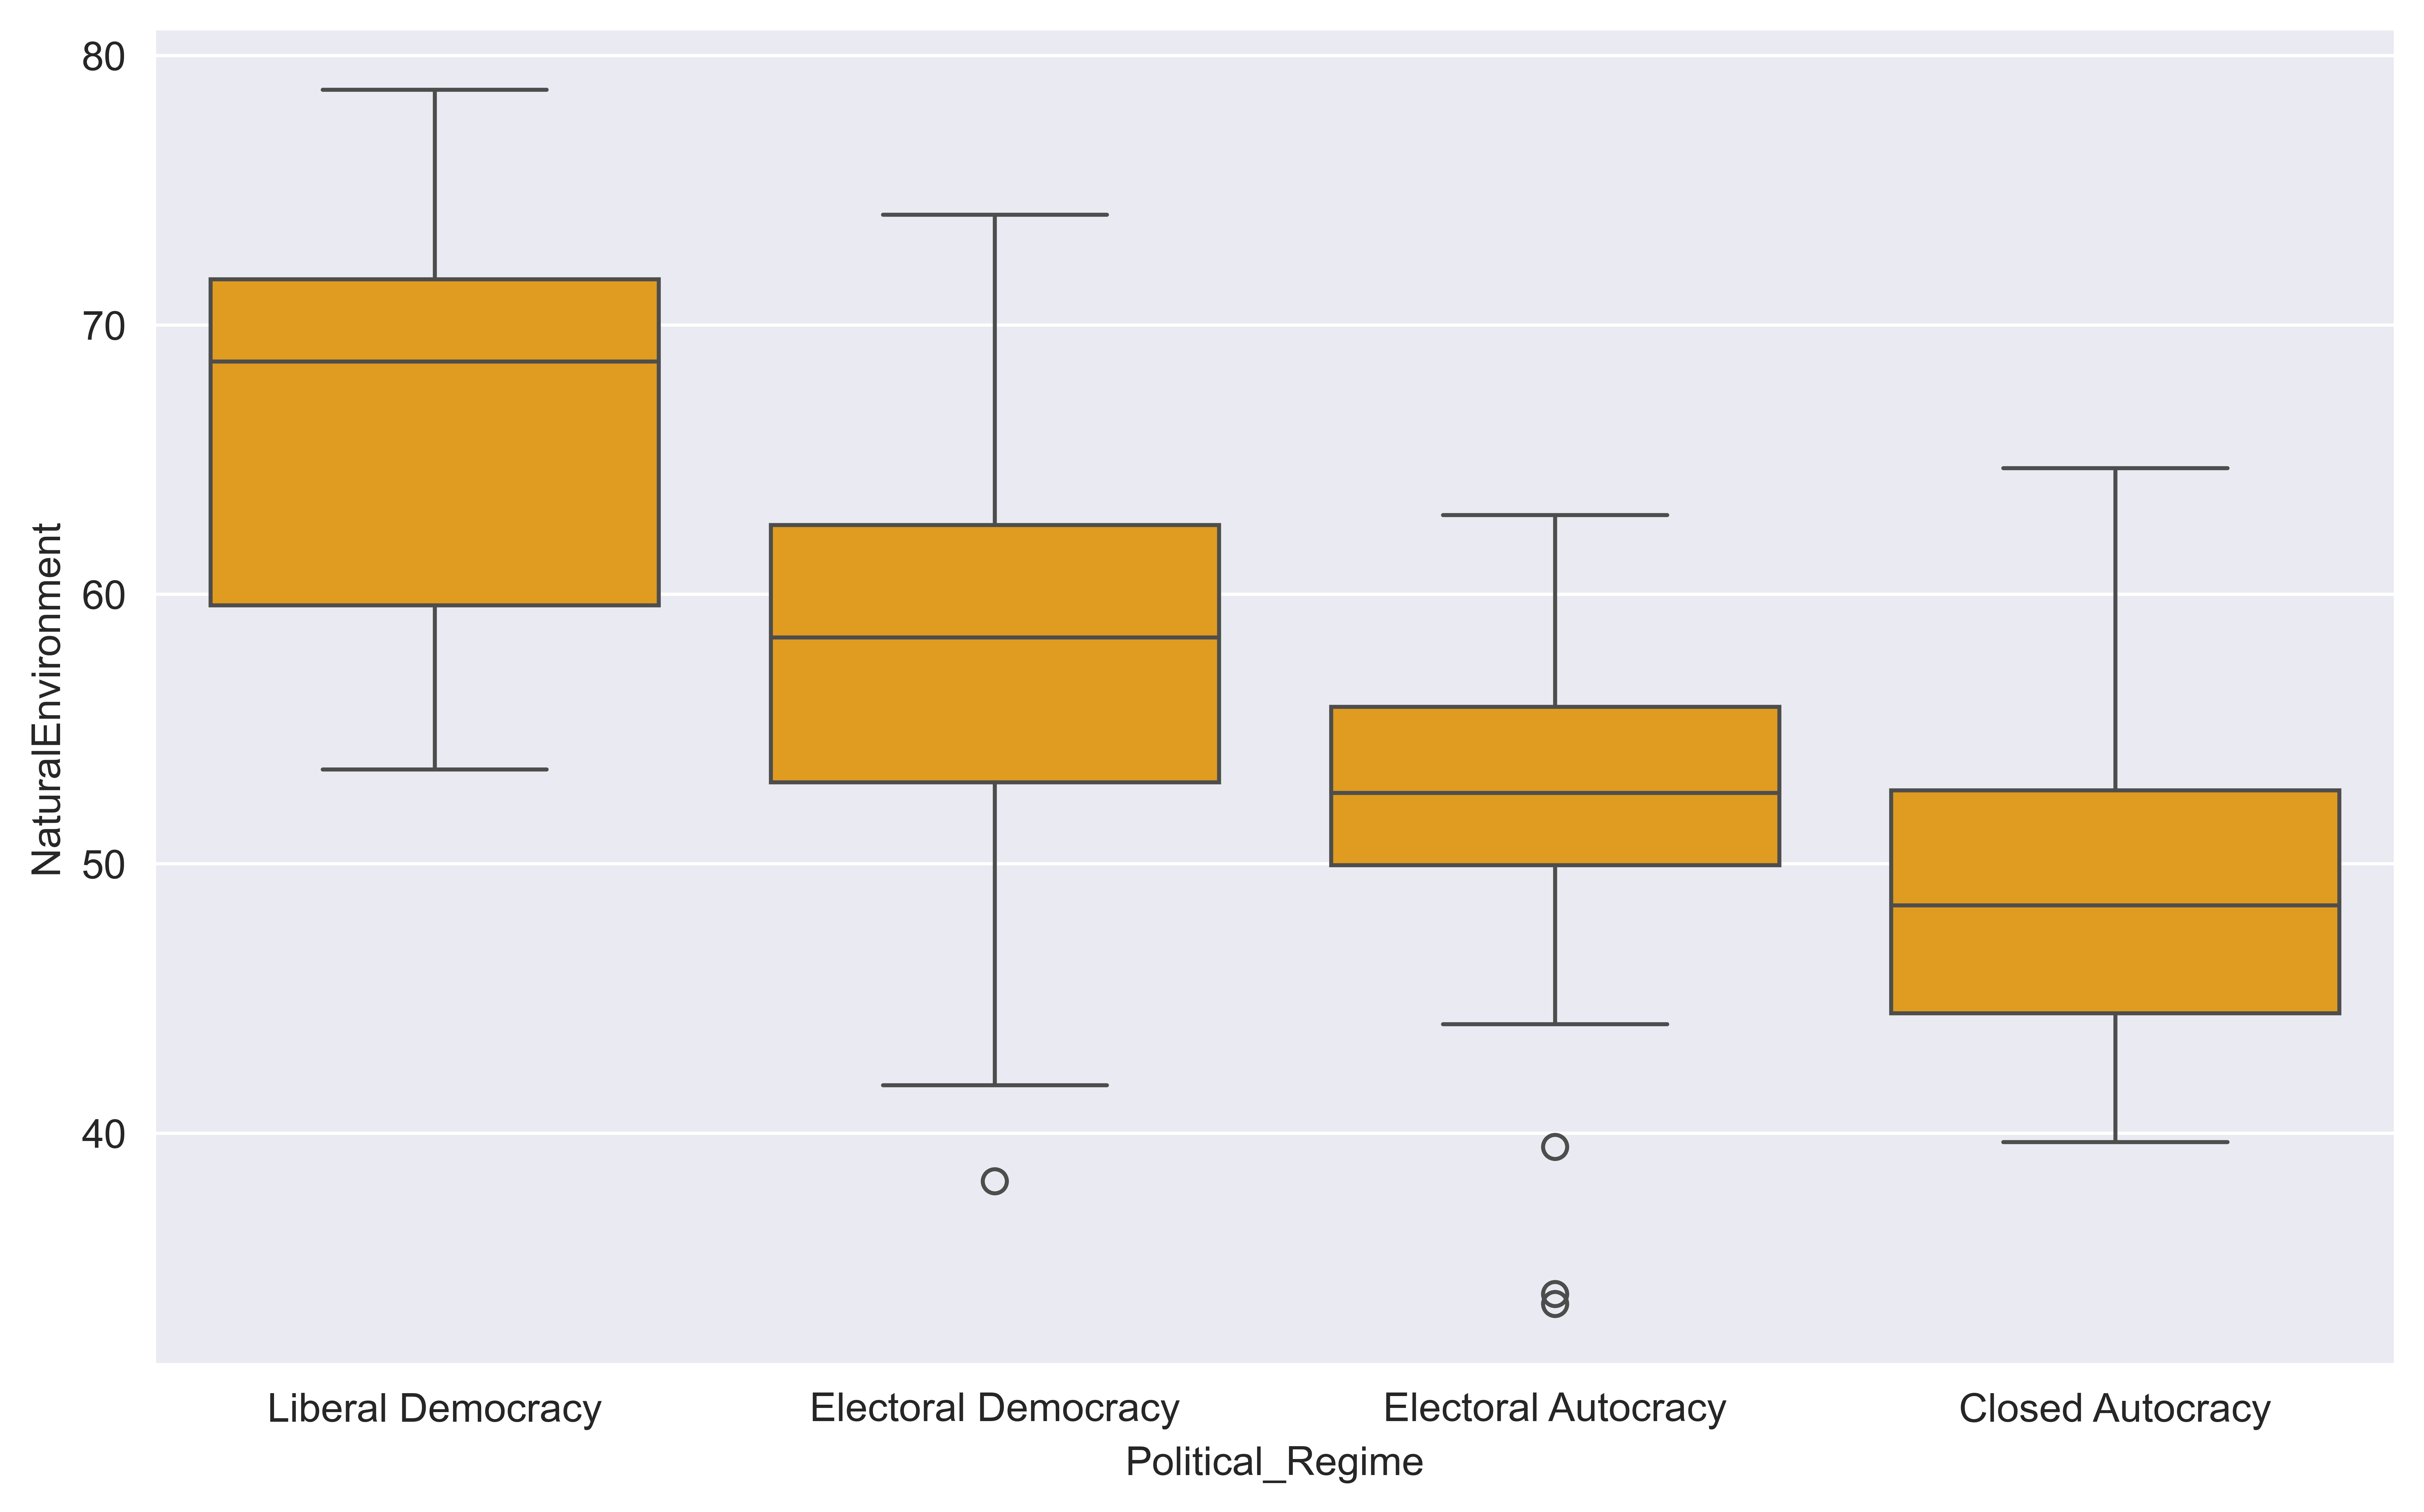

In [97]:
plt.figure(figsize=(10, 6), dpi=900)
sns.boxplot(x='Political_Regime', y='NaturalEnvironment', data=df,color='orange')

<Axes: xlabel='Political_Regime', ylabel='PersonelFreedom'>

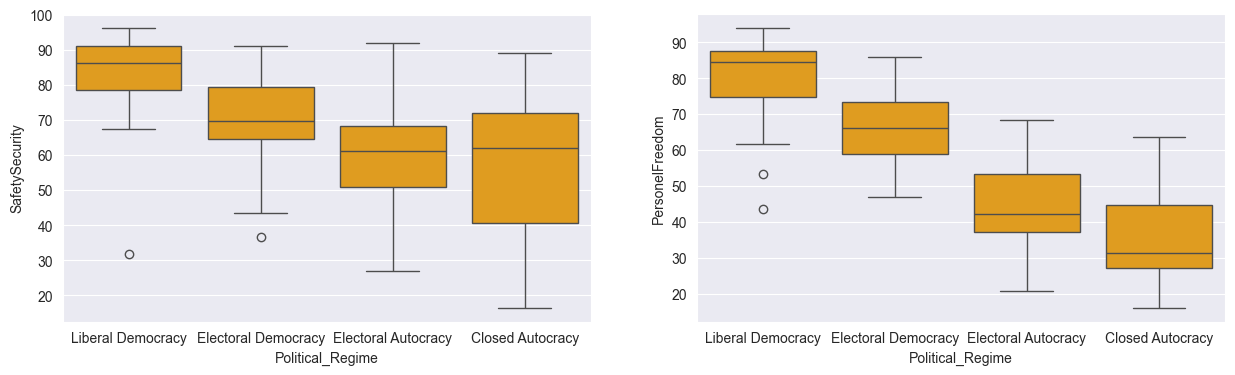

In [99]:
df_1.columns

Index(['SafetySecurity', 'PersonelFreedom', 'Governance', 'SocialCapital',
       'NaturalEnvironment'],
      dtype='object')

<Axes: xlabel='Political_Regime', ylabel='SocialCapital'>

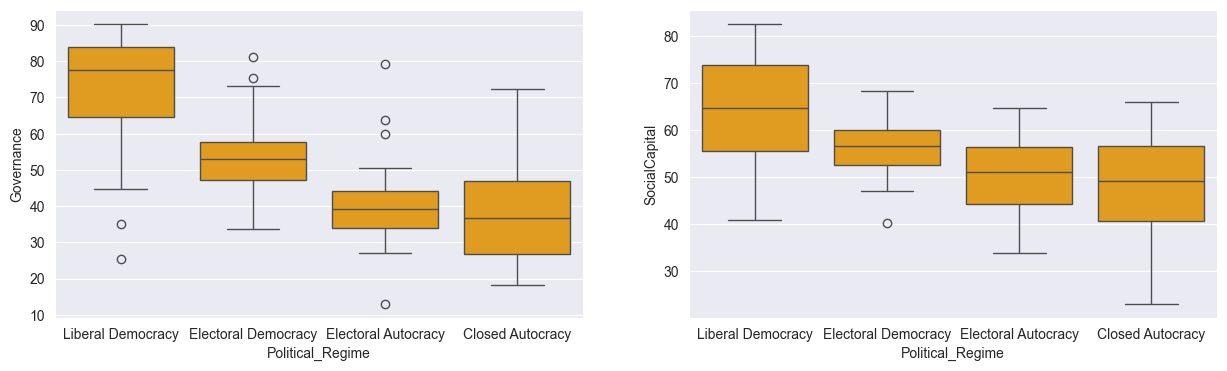

In [100]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
sns.boxplot(x='Political_Regime', y='Governance', data=df,ax=axes[0],color='orange')
sns.boxplot(x='Political_Regime', y='SocialCapital', data=df,ax=axes[1],color='orange')
#sns.boxplot(x='Political_Regime', y='NaturalEnvironment', data=df,ax=axes[4])